In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions


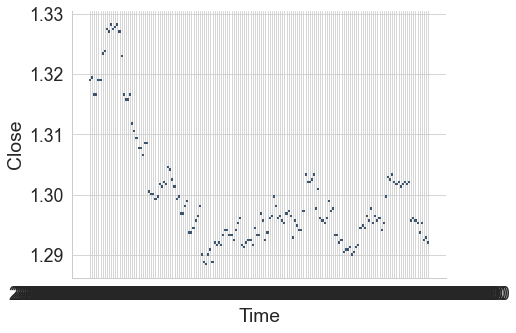

In [4]:
dataset = pd.read_csv("./data/EURUSD_H4.csv", sep="\t")

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2)

sns.displot(data=dataset, x="Time", y="Close", kind="hist", bins=100, aspect=1.5)

,sumsquare_error,aic,bic,kl_div
lognorm,45871.091612,-515.288918,925.246162,inf
gamma,51574.081241,-530.461603,944.112809,inf
burr,62264.615599,-541.683408,979.522435,inf
norm,79648.129988,-517.840372,1009.001894,inf
beta,150680.935224,-548.443625,1121.809614,inf


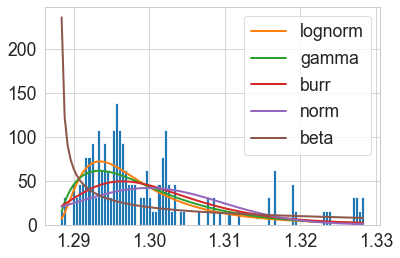

In [5]:
close = dataset["Close"].values
f= Fitter(close, distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [6]:
f.get_best(method='sumsquare_error')

{'lognorm': {'s': 0.6762281468209064,
  'loc': 1.2869419526422972,
  'scale': 0.010316637014223414}}

In [9]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

In [11]:
mu, sigma = 0, 0.1 # mean and standard deviation
data = np.random.normal(mu, sigma, 10000)
data

array([-0.14415606,  0.02553831,  0.09369198, ...,  0.09776149,
       -0.06445805, -0.11862051])

,sumsquare_error,aic,bic,kl_div
norm,2.571055,187.478064,-82641.819588,inf
gamma,2.572996,188.950146,-82625.063175,inf
lognorm,2.597369,188.322924,-82530.781838,inf
exponpow,18.213073,394.909520,-63054.376308,inf
cauchy,31.934061,92.922916,-57448.251119,inf


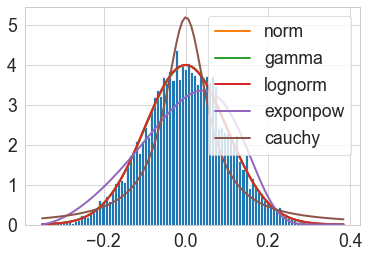

In [12]:
f= Fitter(data, distributions=get_common_distributions())
f.fit()
f.summary()


In [13]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.0005924405480586902, 'scale': 0.10000738074584133}}

In [16]:
f.fitted_param['lognorm']

(0.011217076261904213, -8.909475365984385, 8.909430627825031)